In [282]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [275]:
# Se carga el dataset que he limpiado y preparado para el análisis visual
df = pd.read_csv("../datasets/wines_SPA_cleaned.csv")

In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2048 entries, 0 to 2047
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   winery                 2048 non-null   object 
 1   wine                   2048 non-null   object 
 2   year                   1976 non-null   float64
 3   rating                 2048 non-null   float64
 4   rating_norm            2048 non-null   float64
 5   price                  2048 non-null   float64
 6   price_group            2048 non-null   object 
 7   region                 2048 non-null   object 
 8   body                   2025 non-null   float64
 9   acidity                2025 non-null   float64
 10  quality_price_percent  2048 non-null   float64
dtypes: float64(7), object(4)
memory usage: 176.1+ KB


In [272]:
# Preguntas a las que se busca responder con visualización:

    # 1. Distribución de los precios de los vinos españoles
    # 2. Regiones con la mejor calidad-precio de vinos
    # 3. Factores que influyen en la percepción de la calidad-precio por parte de los clientes
    # 4. Segmnentación de clientes según preferencias y hábitos de compra para camapañas de marketing

# 1. Distribución de los precios de los vinos españoles

#### Boxplot para el grupo de precios "low" - de 0 a 50 €

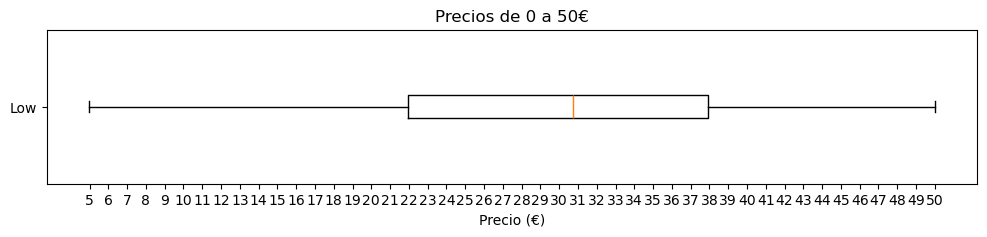

In [ ]:
# Boxplot horizontal para grupo 'low'
low_prices = df[df["price_group"] == "low"]["price"]
plt.figure(figsize=(12, 2))
plt.boxplot(low_prices, vert=False)
plt.title("Precios de 0 a 50€")
plt.xlabel("Precio (€)")
min_tick = 5
max_price = int(low_prices.max())
plt.xticks(np.arange(min_tick, max_price+1, 1))
plt.yticks([1], ["Low"])
plt.show()

In [ ]:
# Conclusión para los vinos con precio entre 0 y 50 euros:
    # Todos los vinos tienen precios concentrados entre los 22 y 38€
    # La mayoría de los vinos están cerca de los 31€

#### Boxplot para el grupo de precios "mid"

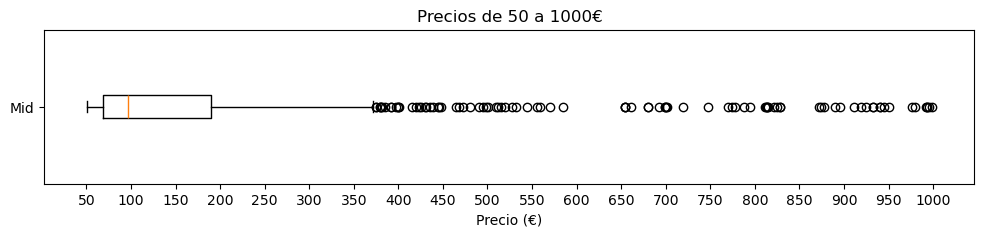

In [ ]:
# Boxplot horizontal para grupo 'mid'
mid_prices = df[df['price_group'] == 'mid']['price']
plt.figure(figsize=(12, 2))
plt.boxplot(mid_prices, vert=False)
plt.title("Precios de 50 a 1000€")
plt.xlabel('Precio (€)')
min_price = int(mid_prices.min())
max_price = int(mid_prices.max())
plt.xticks(np.arange(min_price, max_price+50, 50))
plt.yticks([1], ['Mid'])
plt.show()

In [ ]:
# Conclusión para los vinos con un precio entre 50 y 1000 euros:
    # El grueso de los vinos de este grupo están concentrados entre los 70 y 190€
    # La mayoría de los vinos están cerca de los 100€
    # En el outlier superior se puede destacar que entre los 370€ y los 1000€ hay bastantes vinos, mayormente entre los 370 y los 450€

#### Boxplot para el grupo de precios "high"

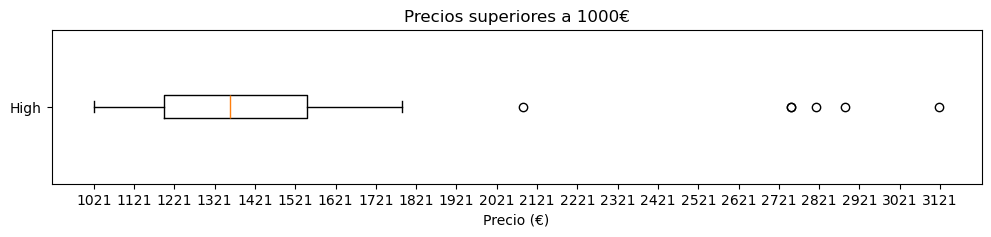

In [ ]:
# Boxplot horizontal para grupo 'high'
high_prices = df[df['price_group'] == 'high']['price']
plt.figure(figsize=(12, 2))
plt.boxplot(high_prices, vert=False)
plt.title("Precios superiores a 1000€")
plt.xlabel('Precio (€)')
min_price = int(high_prices.min())
max_price = int(high_prices.max())
plt.xticks(np.arange(min_price, max_price+100, 100))
plt.yticks([1], ['High'])
plt.show()

In [ ]:
# Conclusión para los vinos con un precio superior a 1000 euros:
    # El grueso de los vinos de este grupo están alrededor de los 1200 y los 1550€
    # La mayoría de los vinos están cerca de los 1360€
    # En el outlier superior hay muy pocos vinos, desde los 2100 hasta los 3121€

#### Boxplot para el total de precios de los vinos españoles

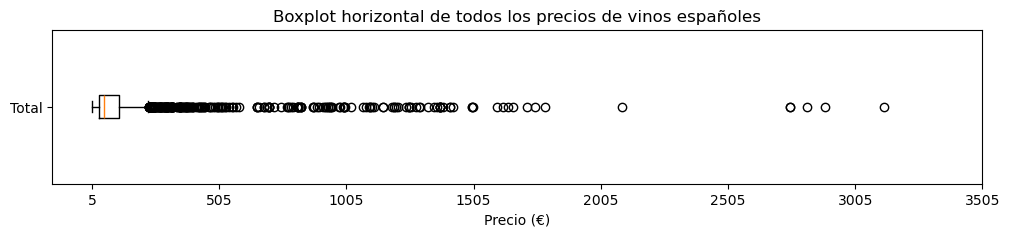

In [ ]:
# Boxplot horizontal para todos los precios
all_prices = df['price']
plt.figure(figsize=(12, 2))
plt.boxplot(all_prices, vert=False)
plt.title("Boxplot horizontal de todos los precios de vinos españoles")
plt.xlabel('Precio (€)')
min_tick = 5
max_price = int(all_prices.max())
plt.xticks(np.arange(min_tick, max_price+500, 500))
plt.yticks([1], ['Total'])
plt.show()

### Conclusión para el total de precios de los vinos españoles:
- La mayoría de los vinos españoles tienen precios concentrados en el rango bajo y medio, con la mediana situada cerca del segmento 'low'.
- El 50% de los vinos está entre precios accesibles y moderados, aunque hay una dispersión considerable hacia precios altos.
- Los outliers superiores corresponden a vinos de lujo, con precios muy por encima del resto.
- En conjunto, el mercado español de vinos presenta una amplia variedad de precios, pero la mayor parte de la oferta se concentra en rangos asequibles para el consumidor medio.

# Regiones con la mejor calidad/precio de vinos
- Identificar las regiones que ofrecen los vinos más valorados
- Comprobar la opinión general de los usuarios en base a la media de precios de cada región

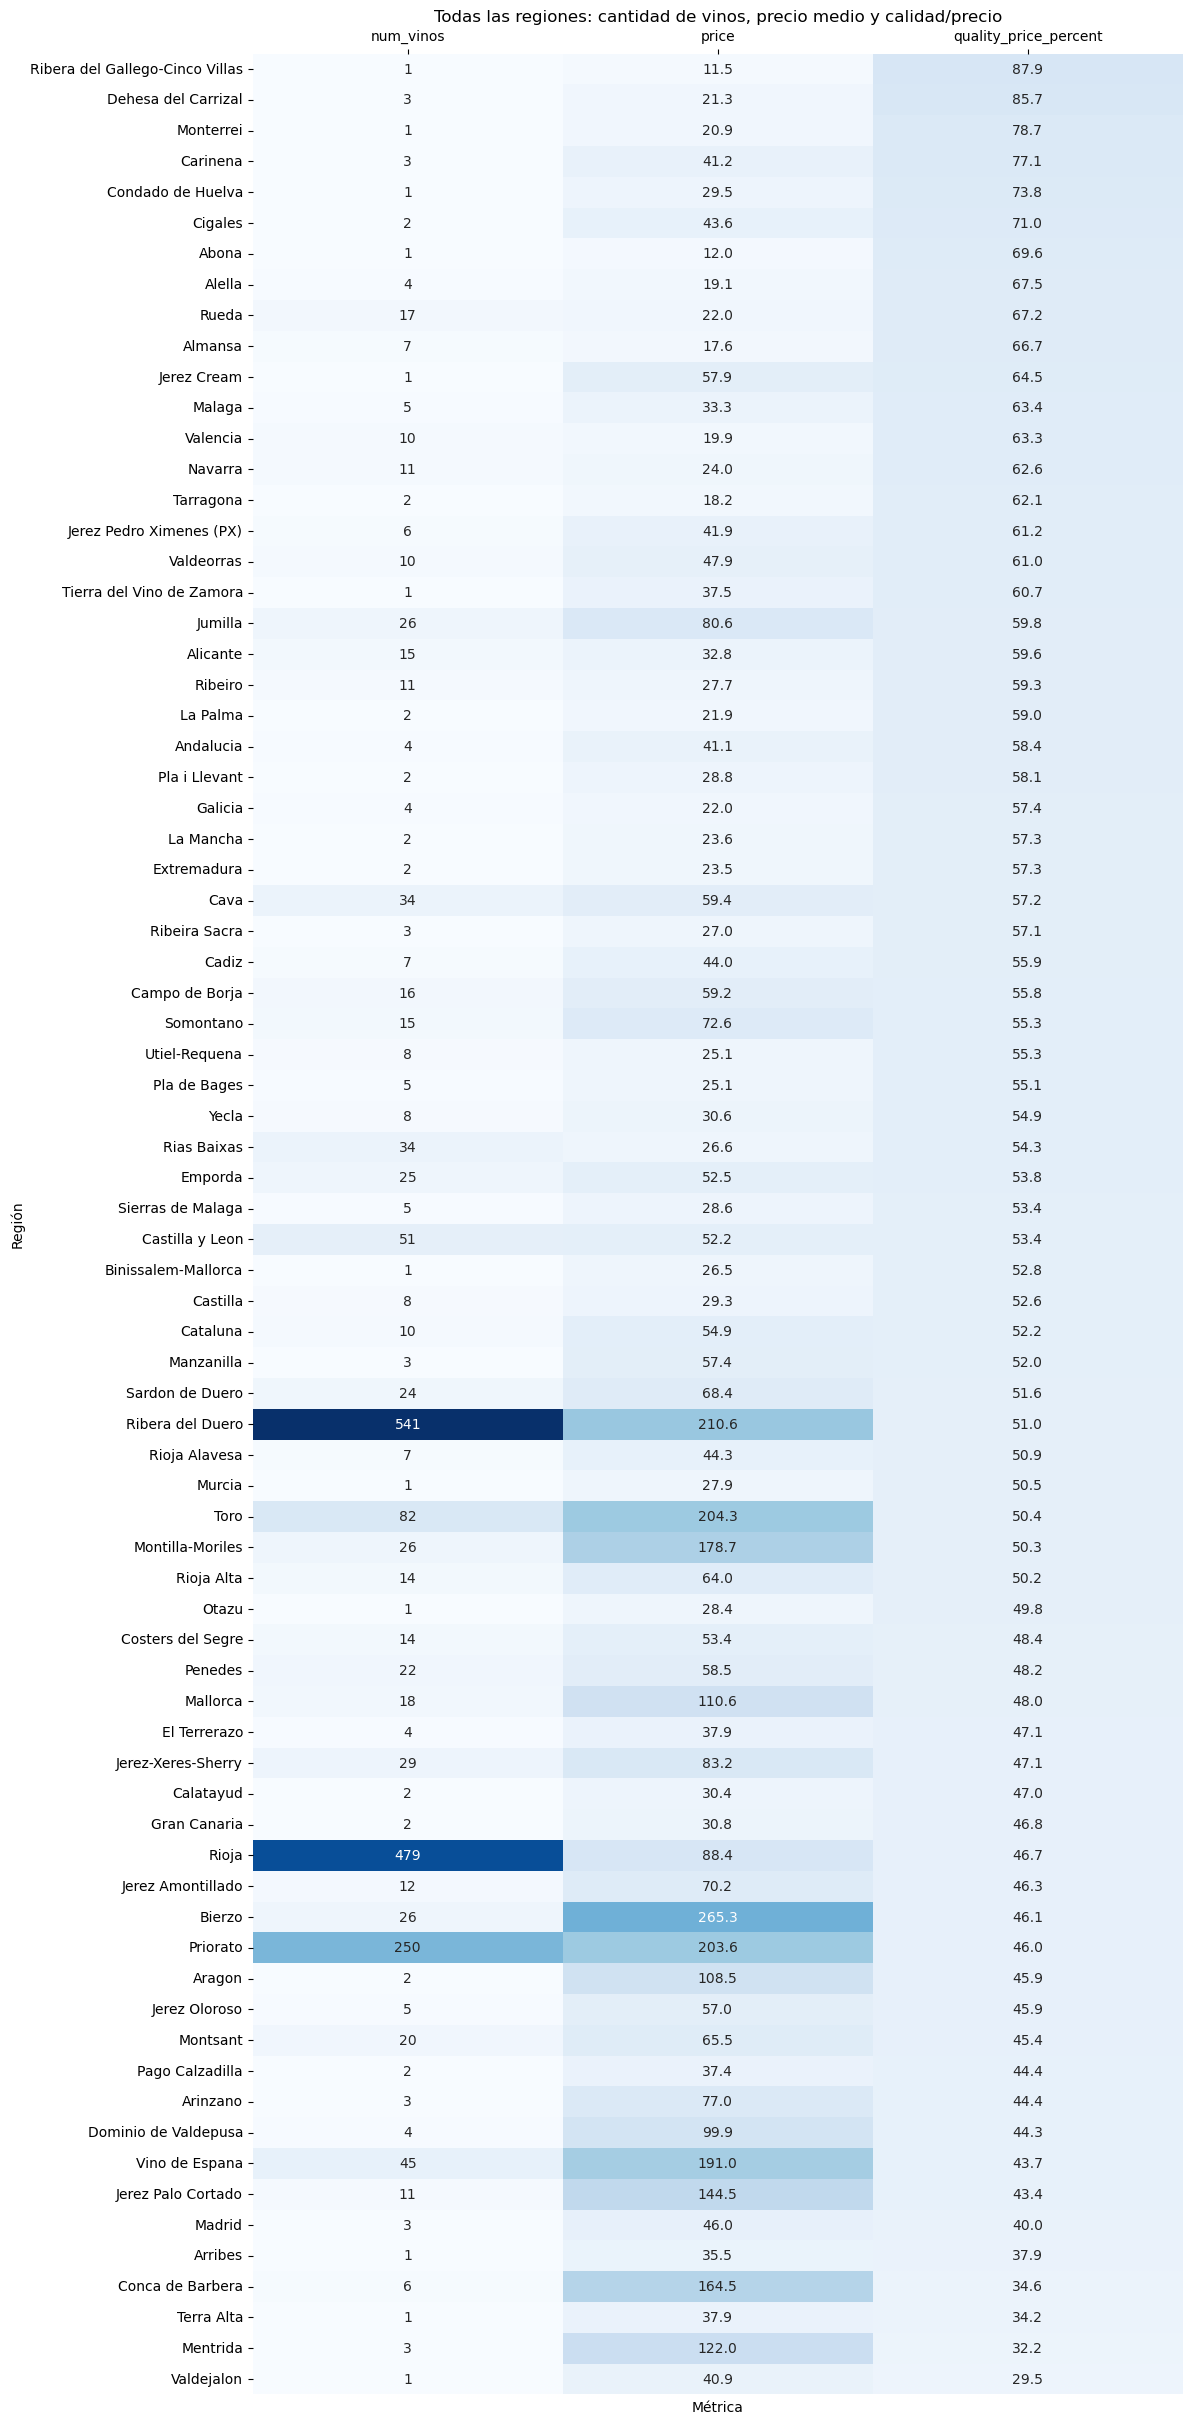

In [285]:
# Heatmap para todas las regiones: cantidad de vinos, precio medio y calidad/precio

# Calcular métricas por región para todos los vinos
pivot_all = df.groupby('region').agg({
    'quality_price_percent': 'mean',
    'price': 'mean',
    'region': 'count'
}).rename(columns={'region': 'num_vinos'})

# Ordenar por calidad/precio descendente
pivot_all = pivot_all.sort_values('quality_price_percent', ascending=False)

# Reordenar columnas: num_vinos, price, quality_price_percent
cols = ['num_vinos', 'price', 'quality_price_percent']

# Preparar matriz de anotaciones con formato personalizado
annotations_all = pivot_all[cols].copy()
annotations_all['num_vinos'] = annotations_all['num_vinos'].astype(int)
for col in ['price', 'quality_price_percent']:
    annotations_all[col] = annotations_all[col].map('{:.1f}'.format)

plt.figure(figsize=(12, max(4, len(pivot_all)*0.4)))
ax = sns.heatmap(pivot_all[cols], annot=annotations_all.values, fmt='', cmap='Blues', cbar=False)
plt.title('Todas las regiones: cantidad de vinos, precio medio y calidad/precio')
plt.ylabel('Región')
ax.xaxis.tick_top()
plt.xlabel('Métrica')
plt.show()

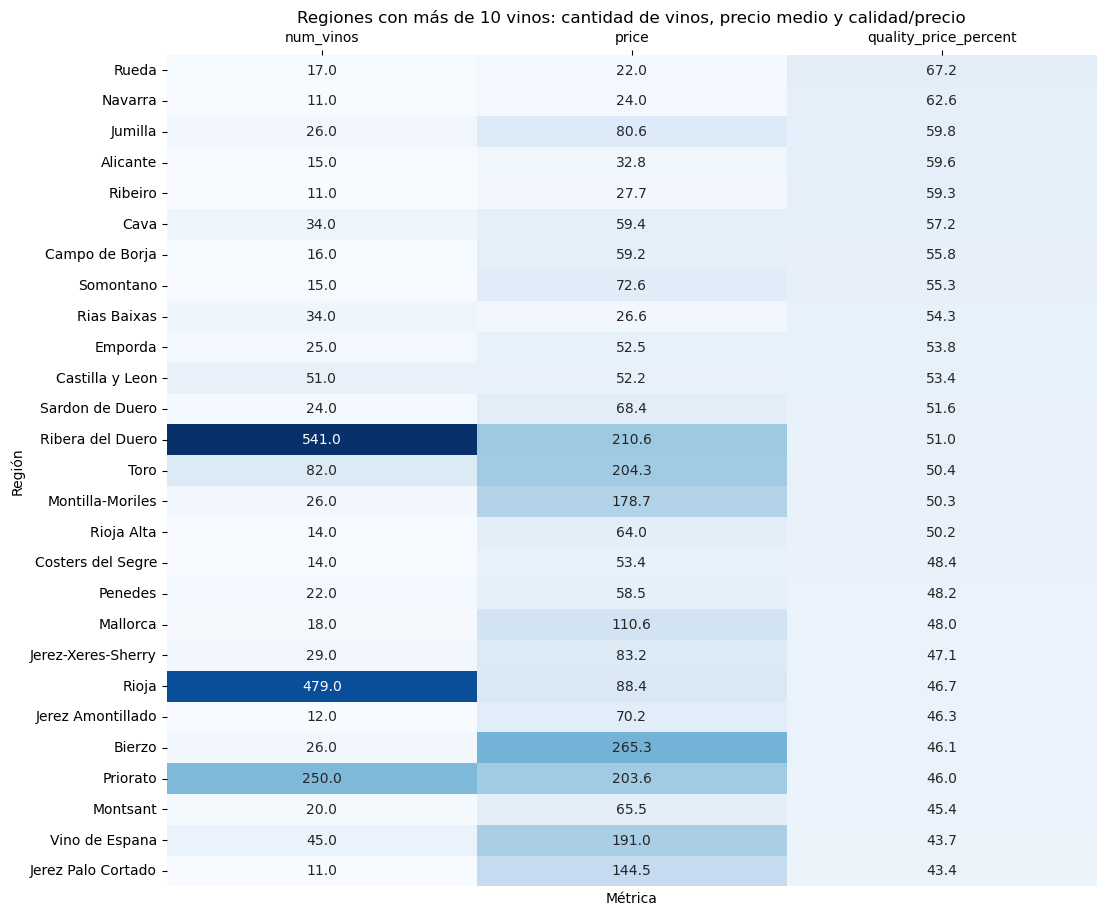

In [284]:
# Heatmap sencillo de cantidad de vinos, precio medio y calidad/precio por región (solo regiones con >10 vinos)

# Filtrar regiones con más de 10 vinos
region_counts = df['region'].value_counts()
selected_regions = region_counts[region_counts > 10].index
df_filtered = df[df['region'].isin(selected_regions)]

# Calcular métricas por región
pivot = df_filtered.groupby('region').agg({
    'quality_price_percent': 'mean',
    'price': 'mean',
    'region': 'count'
}).rename(columns={'region': 'num_vinos'})

# Ordenar por calidad/precio descendente
pivot = pivot.sort_values('quality_price_percent', ascending=False)

# Reordenar columnas: num_vinos, price, quality_price_percent
cols = ['num_vinos', 'price', 'quality_price_percent']
plt.figure(figsize=(12, max(4, len(pivot)*0.4)))
ax = sns.heatmap(pivot[cols], annot=True, fmt='.1f', cmap='Blues', cbar=False)
plt.title('Regiones con más de 10 vinos: cantidad de vinos, precio medio y calidad/precio')
plt.ylabel('Región')
ax.xaxis.tick_top()
plt.xlabel('Métrica')
plt.show()

### Conclusión para la relación calidad/precio por región:
- Antes de dar una conclusión, hay que tener en cuenta que la calidad/precio está basado en notas medias de usuarios en distintas webs, además, las notas mínimas eran desde 4.2 hasta 4.9, en ningún caso una menor calidad/precio refleja que el vino sea malo, simplemente refleja la preferencia de los usuarios.
- En una lectura general de todas las regiones se puede deducir que los vinos con mayor calidad/precio por lo general son vinos con un precio bajo, lo que indica que el consumidor español valora especialmente el equilibrio entre un bajo coste y la satisfacción.
- Al filtrar por regiones con más de 10 vinos, se mantiene la disposicion observada en el conjunto total de las regiones, lo que refuerza la visión de que el usuario valora mejos los vinos de menor precio.
- Las regiones con precios medios elevados no destacan en calidad/precio, estando sobre todo en posiciones medias de la tabla o inferiores, podría entenderse que el usuario espera un producto de mucha más calidad de la que obtendría por un vino con un precio mucho menor y por tanto tiende a darle una menor puntuación.
- A nivel comercial, se podrían trazar estrategias de pedido a los vinos con mayor calidad/precio dentro de las regiones más valorada para tener más oportunidad de mercado a la vez que se pueden ahorrar costos en transporte. Esto nos ayuda a mejorar la rentabilidad y la competitivdad.